## Задача проекта
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Нужно построить модель с предельно большим значением F1-меры.

## Описание данных

**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**
* Exited — факт ухода клиента

---

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve 


In [2]:
#открытие файла
data=pd.read_csv("E:\Churn.csv")

In [3]:
#общая информация о таблице
data.info()

#общая информация о данных
display(data.describe())

#первые строки таблицы
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


* Дана таблица с 14 столбцами, которые содержат в себе по 10000 строк (за исключением таблицы с пропусками Tenure). В таблице присутствуют столбцы  строкового типа а также целочисленного типа и числа с плавающей точкой.

* При изучении данных были обнаружены пропуски в столбце Тenure (сколько лет человек является клиентом банка)-их удалим, так как невозможно их заполнить, а также они составляют меньше 5% от всех данных, поэтому удаление не повлечет за собой существенную потерю данны.
-----

**Так как задача-ответ на вопрос:"Уйдет ли клиент из банка?"-бинарная классификация, то для дальнейшего обучения и предсказаний будем работать с двумя таблицами: таблица с кодировкой категориальных признаков методом onehotcoding для регрессии, таблица с кодировкой категориальных признаков методом OrdinalEncoder для модели случайного леса.**

In [4]:
#таблица для работы с методом случайного леса
data_forest=pd.read_csv("E:\\Churn.csv")

#таблица для работы с методом логистической регрессии
data_regression=pd.read_csv("E:\\Churn.csv")

In [32]:
#удаление пропущенных значений
data_forest=data_forest.dropna().reset_index()
data_regression=data_regression.dropna().reset_index()

* Пропуски удалены

### Вывод о первичной обработке данных
* Для дальнейшего обчуения и предсказания было принято решение работать с двумя таблицами: data_forest-для кодировки категориальных признаков методом OrdinalEncoder, data_regression-для кодироовки категориальных признаков методом onehotcoding 
* Из таблиц data_forest и data_regression были обнаружены и удалены пропущенные значения в столбце Tenure.
---

## Исследование задачи


<font size="2"><b>Задача проекта-ответ на вопрос:"Уйдет ли клиент из банка?"-бинарная классификация, для дальнейшего обучения и предсказаний будем работать с двумя моделями: модель случайного леса и модель логистической регрессии.</b></font>

* При изучении данных таблицы были обнаружены столбцы 'RowNumber', 'CustomerId', 'Surname','index',которые никак не влияют на целевой признак, поэтому для лучшей работы моделей их стоит удалить.

In [6]:
#удаление столбцов 'RowNumber', 'CustomerId', 'Surname','index'
data_forest=data_forest.drop(columns=['RowNumber', 'CustomerId', 'Surname','index'])
data_regression=data_regression.drop(columns=['RowNumber', 'CustomerId', 'Surname','index'])

Так как модели не могут работать с категориальными признаками, то применим два способа кодировки для разных моделей:  

In [7]:
#находим категориальные признаки
data.select_dtypes(include=['object']).copy()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [8]:
#кодировка методом onehotcoding для регрессии

#названия столбцов с категориальными признаками
col=['Geography','Gender']

#применение метода
onehot_encoder =preprocessing.OneHotEncoder(drop='first',handle_unknown='error')
onehot_encoder.fit(data_regression[col])
a=pd.DataFrame(onehot_encoder.transform(data_regression[col]).toarray())
a.columns = onehot_encoder.get_feature_names(['geography','gender'])
#объединение таблицы с закодированными категориальными переменными с остальными признаками
data_regression=a.join(data_regression)
data_regression=data_regression.drop(columns=col)

In [33]:
#кодировка для деревеьев методом OrdinalEncoder

ord_enc = OrdinalEncoder()
data_forest['Geography'] = ord_enc.fit_transform(data_forest[['Geography']])
data_forest['Gender'] = ord_enc.fit_transform(data_forest[['Gender']])

Для обучения моделей данные нужно разделить на признаки и целевой признак. Также генеральную совокупность нужно разделить на три выборки: тренировочную, валидационную и тестовую (60:20:20).
Исходя из задачи мы имеем: 
* Признаки
RowNumber — индекс строки в данных
CustomerId — уникальный идентификатор клиента
Surname — фамилия
CreditScore — кредитный рейтинг
Geography — страна проживания
Gender — пол
Age — возраст
Tenure — сколько лет человек является клиентом банка
Balance — баланс на счёте
NumOfProducts — количество продуктов банка, используемых клиентом
HasCrCard — наличие кредитной карты
IsActiveMember — активность клиента
EstimatedSalary — предполагаемая зарплата
* Целевой признак
Exited — факт ухода клиента

In [11]:
#для деревьев
#разделение данных на три выборки: тренировочная, валидационную,тестовая
data_temporary_forest,data_valid_forest=train_test_split(data_forest,test_size=0.2,random_state=1234)
data_train_forest,data_test_forest=train_test_split(data_temporary_forest,test_size=0.25,random_state=1234)

#признаки тренировочные
data_train_forest_features=data_train_forest.drop('Exited',axis=1)

#целевой признак тренировочный
data_train_forest_target=data_train_forest['Exited']

#признаки валидационные
data_valid_forest_features=data_valid_forest.drop('Exited',axis=1)

#целевой признак валидационный
data_valid_forest_target=data_valid_forest['Exited']

#признаки тестовые
data_test_forest_features=data_test_forest.drop('Exited',axis=1)

#целевой признак тестовый
data_test_forest_target=data_test_forest['Exited']

In [12]:
#для регрессии
#разделение данных на три выборки: тренировочная, валидационную,тестовая
data_temporary_regression,data_valid_regression=train_test_split(data_regression,test_size=0.2,random_state=1234)
data_train_regression,data_test_regression=train_test_split(data_temporary_regression,test_size=0.25,random_state=1234)

#признаки тренировочные
data_train_regression_features=data_train_regression.drop('Exited',axis=1)

#целевой признак тренировочный
data_train_regression_target=data_train_regression['Exited']

#признаки валидационные
data_valid_regression_features=data_valid_regression.drop('Exited',axis=1)

#целевой признак валидационный
data_valid_regression_target=data_valid_regression['Exited']

#признаки тестовые
data_test_regression_features=data_test_regression.drop('Exited',axis=1)

#целевой признак тестовый
data_test_regression_target=data_test_forest['Exited']

Произведем масштабирование количественных признаков(всех количественных признаков, кроме бинарных) методом стандартизации данных.


In [13]:
#нахождение количественных признаком
data_forest.columns
data_forest.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1


In [14]:
#количественные признаки(кроме бинарных)
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']

#стандартизация данных для дерева
scaler_f=StandardScaler()
scaler_f.fit(data_train_forest_features[numeric])

data_train_forest_features[numeric] = scaler_f.transform(data_train_forest_features[numeric])

data_valid_forest_features[numeric] = scaler_f.transform(data_valid_forest_features[numeric])

data_test_forest_features[numeric] = scaler_f.transform(data_test_forest_features[numeric])


In [15]:
#стандартизация данных для регрессии
scaler_r=StandardScaler()
scaler_r.fit(data_train_regression_features[numeric])

data_train_regression_features[numeric] = scaler_r.transform(data_train_regression_features[numeric])

data_valid_regression_features[numeric] = scaler_r.transform(data_valid_regression_features[numeric])

data_test_regression_features[numeric] = scaler_r.transform(data_test_regression_features[numeric])


In [16]:
#проверка размера выборок
print(data_train_regression_features.shape,data_train_regression_target.shape,data_valid_regression_features.shape,data_valid_regression_target.shape,
data_test_regression_features.shape,data_test_regression_target.shape)

(5454, 11) (5454,) (1819, 11) (1819,) (1818, 11) (1818,)


### Вывод о подготовке данных перед обучением моделей
* Для дальнейшего обучения и предсказаний было принято решение работать с двумя моделями: модель случайного леса и модель логистической регрессии
* Были удалены столбцы 'RowNumber', 'CustomerId', 'Surname', 'index',так как они никак не влияют на целевой признак.
* Была произведена кодировка качественных признаков  методом onehotcoding для регрессии

* Была произведена кодировка качественных признаков для деревеьев методом OrdinalEncoder

* Было произведено масштабирование количественных признаков(всех количественных признаков, кроме бинарных) методом стандартизации данных.

* Данные были  разделены на признаки и целевой признак. 
* Генеральная совокупность была разделена на тестовую, валидационную и тренировочную выборки.
---


<font size="5"><b>Обучение моделей</b></font>

Обучение моделей без учета дисбаланса классов

In [17]:
#модель логистической регрессии
model_regression=LogisticRegression(random_state=12345,solver='lbfgs')
#обучение модели
model_regression.fit(data_train_regression_features,data_train_regression_target)

predictions_regression=model_regression.predict(data_valid_regression_features)

#f-1 метрика
print('f-1 метрика=',f1_score(data_valid_regression_target,predictions_regression))

f-1 метрика= 0.31237322515212984


In [18]:
#обучение модели дерева
best_model_forest=None
best_result_forest=0
depth_forest=0
best_estimators=0

#перебираем значения глубины от 1 до 19
for depth in range(1,20):
    #перебираем количество деревьев от 1 до 19
    for estimators in range(1,20):
        model=RandomForestClassifier(random_state=12345,max_depth=depth,n_estimators=estimators)
        model.fit(data_train_forest_features,data_train_forest_target)
        predictions=model.predict(data_valid_forest_features)
        score=f1_score(data_valid_forest_target,predictions)
        if score>best_result_forest:
            best_model_forest=model
            best_result_forest=score
            depth_forest=depth
            best_estimators=estimators
print('Максимальная метрика f1-',best_result_forest,'была достигнута при глубине -',depth_forest,', количестве деревьей -',estimators)   


Максимальная метрика f1- 0.5897858319604613 была достигнута при глубине - 15 , количестве деревьей - 19


### Вывод о предсказанных данных и обученных моделей без учета дисбалансов классов
Были обучены модели случайного леса и логистической регрессии, модели были протестированы на валидационной выборке по ним была посчитана F-1 метрика:
* 0.31(логистическая регрессия)-метрика очень низкая,обученная модель не умеет прогнозировать верно положительный класс
* 0.589(модель случайного леса с глубиной 15 и количеством деревьев-19)-метрика выше,чем у логистической регресси, но также далека от 1

## Борьба с дисбалансом

In [19]:
#проверка дисбаланса классов
data_train_forest_target.value_counts()

0    4332
1    1122
Name: Exited, dtype: int64

Положительного класса в 4 раза меньше. Для улучшения предсказания положительного класса применим методы борьбы с дисбалансом: взвешивание классов, увеличение выборки, уменьшение выборки.

<font size="3"><b>Взвешивание классов</b></font>

In [20]:
#взвешивание классов для логистической регрессии
model_regression=LogisticRegression(random_state=12345,solver='lbfgs',class_weight ='balanced')

model_regression.fit(data_train_regression_features,data_train_regression_target)

predictions_regression=model_regression.predict(data_valid_regression_features)
print('Логистическая регрессия.')
print('f-1 метрика =',f1_score(data_valid_regression_target,predictions_regression))


Логистическая регрессия.
f-1 метрика = 0.49630996309963105


In [21]:
#взвешивание классов для модели случайного леса

#обучение модели дерева
best_model_forest2=None
best_result_forest=0
depth_forest=0
best_estimators=0
#перебираем значения глубины от 1 до 19
for depth in range(1,20):
    #перебираем количество деревьев от 1 до 19
    for estimators in range(1,20):
        model=RandomForestClassifier(random_state=12345,max_depth=depth,n_estimators=estimators,class_weight ='balanced')
        model.fit(data_train_forest_features,data_train_forest_target)
        predictions=model.predict(data_valid_forest_features)
        score=f1_score(data_valid_forest_target,predictions)
        if score>best_result_forest:
            best_model_forest2=model
            best_result_forest=score
            depth_forest=depth
            best_estimators=estimators
print('Модель случайного леса.')            
print('Максимальная метрика f1 -',best_result_forest,'была достигнута при глубине -',depth_forest,', количестве деревьей -',estimators)   


Модель случайного леса.
Максимальная метрика f1 - 0.6136680613668062 была достигнута при глубине - 11 , количестве деревьей - 19


<font size="3"><b>Метод уменьшения</b></font>

In [22]:
#борьба с дисбалансом методом уменьшения

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
 
#новые выборки с уменьшенным отрицательным классом
data_train_regression_features_down, data_train_regression_target_down = downsample(data_train_regression_features, data_train_regression_target, 0.3)
data_train_forest_features_down, data_train_forest_target_down = downsample(data_train_forest_features, data_train_forest_target, 0.4)

In [23]:
#модель логистической регрессии с преобразованием дисбаланса методом уменьшения

model_regression=LogisticRegression(random_state=12345,solver='lbfgs')

model_regression.fit(data_train_regression_features_down, data_train_regression_target_down)

predictions_regression=model_regression.predict(data_valid_regression_features)
print('Логистическая регрессия.')
print('F-1 метрика = ',f1_score(data_valid_regression_target,predictions_regression))


Логистическая регрессия.
F-1 метрика =  0.49795081967213123


In [24]:
#модель случайного леса с преобразованием дисбаланса методом уменьшения

#обучение модели дерева
best_model_forest1=None
best_result_forest=0
depth_forest=0
best_estimators=0
#перебираем значения глубины от 1 до 19
for depth in range(1,20):
    #перебираем количество деревьев от 1 до 19
    for estimators in range(1,20):
        model=RandomForestClassifier(random_state=12345,max_depth=depth,n_estimators=estimators)
        model.fit(data_train_forest_features_down, data_train_forest_target_down)
        predictions=model.predict(data_valid_forest_features)
        score=f1_score(data_valid_forest_target,predictions)
        if score>best_result_forest:
            best_model_forest1=model
            best_result_forest=score
            depth_forest=depth
            best_estimators=estimators
print('Модель случайного леса.')            
print('Максимальная метрика f1 -',best_result_forest,'была достигнута при глубине -',depth_forest,', количестве деревьей -',estimators)   

Модель случайного леса.
Максимальная метрика f1 - 0.6149936467598475 была достигнута при глубине - 7 , количестве деревьей - 19


<font size="3"><b>Метод увеличения</b></font>

In [25]:
#борьба с дисбалансом увеличением
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

#новые выборки с увеличенным положительным классом
data_train_regression_features_up, data_train_regression_target_up = upsample(data_train_regression_features, data_train_regression_target,4)
data_train_forest_features_up, data_train_forest_target_up = upsample(data_train_forest_features, data_train_forest_target, 2)


In [26]:
#модель логистической регрессии с преобразованием дисбаланса методом увеличения
model_regression=LogisticRegression(random_state=12345,solver='lbfgs')

model_regression.fit(data_train_regression_features_up, data_train_regression_target_up)

predictions_regression=model_regression.predict(data_valid_regression_features)

print('Логистическая регрессия.')
print('f-1 метрика = ',f1_score(data_valid_regression_target,predictions_regression))


Логистическая регрессия.
f-1 метрика =  0.49138712601994555


In [27]:
#модель случайного леса с преобразованием дисбаланса методом увеличения

#обучение модели дерева
best_model_forest=None
best_result_forest=0
depth_forest=0
best_estimators=0
#перебираем значения глубины от 1 до 19
for depth in range(1,20):
    #перебираем количество деревьев от 1 до 19
    for estimators in range(1,20):
        model=RandomForestClassifier(random_state=12345,max_depth=depth,n_estimators=estimators)
        model.fit(data_train_forest_features_up, data_train_forest_target_up)
        predictions=model.predict(data_valid_forest_features)
        score=f1_score(data_valid_forest_target,predictions)
        if score>best_result_forest:
            best_model_forest=model
            best_result_forest=score
            depth_forest=depth
            best_estimators=estimators
print('Модель случайного леса.')            
print('Максимальная метрика f1 -',best_result_forest,'была достигнута при глубине -',depth_forest,', количестве деревьей -',estimators)   

Модель случайного леса.
Максимальная метрика f1 - 0.6271186440677966 была достигнута при глубине - 9 , количестве деревьей - 19


### Вывод о предсказанных данных и обученных моделях при учете дисбаланса классов

* Наибольший показатель метрики F-1 для модели логистической регресси(=0.49795081967213123) был достигнут при преобразованием дисбаланса методом уменьшения(показатель fraction = 0.3). 

* Наибольший показатель метрики F-1 для модели случайного леса (=0.6271186440677966 ) был достигнут при преобразовании дисбаланса методом увеличения(положительный класс увеличился в 2 раза) при глубине 9 и количестве деревьев = 19.

<font size="3"><b>Вывод</b></font>: наилчушая модель(исходя из тестирования на валидационной выборке)-  модель случайного дерева при преобразовании дисбаланса методом увеличения(положительный класс увеличился в 2 раза) при глубине 9 и количестве деревьев 19.

<font size="3"><b>Значения метрики AUC-ROC для наилучшей модели</b></font>

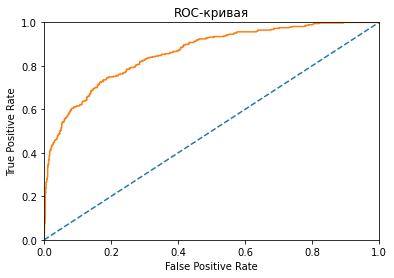

0.8600943169620405


In [28]:
#вероятность классов
probabilities_valid = best_model_forest.predict_proba(data_valid_forest_features)
#вероятность положительного класса
probabilities_one_valid = probabilities_valid[:, 1]

#значения FPR, значения TPR и рассмотренные пороги
fpr, tpr, thresholds = roc_curve(data_valid_forest_target,probabilities_one_valid)

plt.figure()
# ROC-кривая
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0]) 
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая") 
plt.show()


auc_roc=roc_auc_score(data_valid_forest_target,probabilities_one_valid)

print(auc_roc)

### Вывод исходя из метрики AUC-ROC
Метрика для модели случайного дерева выше, чем для случайной модели.

## Тестирование модели

In [29]:
#тестирование наилучшей модели на тестовой выборке
predictions=best_model_forest.predict(data_test_forest_features)
print('f-1 = ',f1_score(data_test_forest_target,predictions))

probabilities_valid = best_model_forest.predict_proba(data_train_forest_features)
#вероятность положительного класса
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(data_train_forest_target,probabilities_one_valid)

print('auc_roc = ',auc_roc)

f-1 =  0.5778401122019635
auc_roc =  0.9438146743629878


In [30]:
#тестирование модель случайного леса с преобразованием дисбаланса методом уменьшения на тестовой выборке
predictions=best_model_forest1.predict(data_test_forest_features)
print('f-1 = ',f1_score(data_test_forest_target,predictions))

probabilities_valid = best_model_forest1.predict_proba(data_train_forest_features)
#вероятность положительного класса
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(data_train_forest_target,probabilities_one_valid)

print('auc_roc = ',auc_roc)

f-1 =  0.597911227154047
auc_roc =  0.8957201763438524


## Вывод о проделанной работе
* Изучена общая информация о предоставленных данных.
* Данные были обработаны: избавилась от пропущенных значений.
* Задача проекта -бинарная классификация, поэтому обучение и предсказание было сделано для двух таблиц: таблица с кодировкой категориальных признаков методом onehotcoding для регрессии, таблица с кодировкой категориальных признаков методом OrdinalEncoder для модели случайного леса.
* Было произведено масштабирование количественных признаков (всех количественных признаков, кроме бинарных) методом стандартизации данных.
* Данные были разделены на признаки и целевой признак. Генеральная совокупность была разделена на тестовую, валидационную и тренировочную выборки в соотношении 60:20:20.
* Были обучены модели линейной регрессии(F-1 метрика = 0.31) и случайного леса(F-1 метрика = 0.589) без учета дисбаланса классов.
* Борьба с дисбалансом была проведена тремя методами: взвешивание классов, метод уменьшения, метод увеличения. Для каждого метода была рассчитана F-1 метрика и найдена наилучшая модель.
* Рассчитано значение метрики AUC-ROC для наилучшей модели.

### Вывод из цели
* Наибольший показатель f-1 метрики при тестировании на тестовой выборке показала модель случайного леса с преобразованием дисбаланса методом уменьшения(=0.5979)
* Наилучшая модель исходя из тестирования на валидационной выборке при тестировании на тестовой выборке показала метрику f-1 хуже(=0.5778401122019635)
* AUC_ROC метрика выше у наилучушей модели по валидационному тестированию, но для полученных данных метрика f-1 важнее, так как присутствует дисбаланс классов.

<font size="3"><b>Наилучшая модель при тестировании на тестовой выборке(f-1 =  0.5979) - модель случайного леса с преобразованием дисбаланса методом уменьшения с глубиной 5 и количеством деревьев 19. </b></font>